In [1]:
%matplotlib inline

from pathlib import Path
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_INT = (Path(os.getcwd()) / os.pardir / 'data' / 'interim').resolve()

In [2]:
import sys
sys.path.append(os.path.join(os.getcwd(), os.pardir, 'src'))

%load_ext autoreload

%autoreload 2
from visualization.visualize import *

In [3]:
wb = pd.read_csv(Path("../data/interim/external-processed/country_world_bank_indicators.csv"), index_col=0)

In [4]:
gpw = pd.read_csv(Path("../data/interim/external-processed/counrty_population_nasa.csv"), index_col=0)

In [5]:
wb.head()

,crude_birth_rate_2016,population_2016,infant_mortality_rate_2016
Country Code,,,
ABW,10.963,104822.0,NaN
AFG,33.980,34656032.0,53.2
AGO,42.321,28813463.0,54.6
ALB,11.879,2876101.0,12.0
AND,9.500,77281.0,2.4


In [6]:
gpw.head()

,UN_2015_E
ISOALPHA,
ABW,103889.0
AFG,32526557.0
AGO,25021969.0
AIA,14614.0
ALA,29227.0


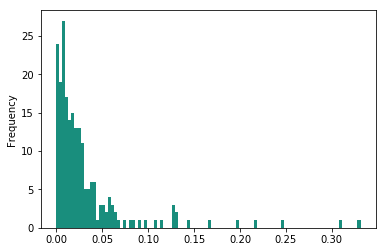

In [7]:
error = ((wb.population_2016 - gpw.UN_2015_E) / wb.population_2016).abs()
bad_data_mask = error > 0.05

error.plot.hist(bins=100)

In [8]:
wb[bad_data_mask].join(gpw)

/Users/bull/anaconda3/envs/subnational-vaccines/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,crude_birth_rate_2016,population_2016,infant_mortality_rate_2016,UN_2015_E
Country Code,,,,
AFG,33.980,34656032.0,53.2,32526557.0
AGO,42.321,28813463.0,54.6,25021969.0
ATG,16.367,100963.0,5.1,91819.0
BDI,42.662,10524117.0,48.4,11178924.0
BIH,9.120,3516816.0,5.2,3810417.0
BMU,9.400,65331.0,NaN,62003.0
CAF,36.113,4594621.0,88.5,4900272.0
COG,35.234,5125821.0,38.5,4620330.0
DJI,23.350,942333.0,53.5,887861.0


In [9]:
dtypes = {
    "Iso Code": 'object',
    "Country Name": 'category',
    'WHO Region': 'category',
    'Year': 'int',
    'Vaccine Type': 'category',
    'Admin1': 'object',
    'Admin2': 'object',
    'DenomType': 'float',
    'Denominator': 'float',
    'Numerator': 'float',
    'Coverage': 'float'
}

who_df = pd.read_excel(Path('../data/raw/Data_request_20171201.xlsx'), dtype=dtypes, na_values=[-2222, -4444])
who_df.head()

,Iso Code,Country Name,WHO Region,Year,Vaccine Type,Admin1,Admin2,DenomType,Denominator,Numerator,Coverage
0,AFG,Afghanistan,EMRO,2016,BCG,NaN,Aab Band,1.0,1266.0,NaN,51.801245
1,AFG,Afghanistan,EMRO,2016,BCG,NaN,Aab Kamari,1.0,4599.0,NaN,94.674670
2,AFG,Afghanistan,EMRO,2016,BCG,NaN,Aaqcha,1.0,5674.0,NaN,72.116489
3,AFG,Afghanistan,EMRO,2016,BCG,NaN,Acheen,1.0,4846.0,NaN,35.203626
4,AFG,Afghanistan,EMRO,2016,BCG,NaN,Adraskan,1.0,3557.0,NaN,81.468327


In [10]:
both_concat = np.where(pd.notnull(who_df.Admin2) & pd.notnull(who_df.Admin1),
                       who_df.Admin1.astype(str) + " - " + who_df.Admin2.astype(str),
                       who_df.Admin2)

who_df['available_admin'] = np.where(pd.notnull(who_df.Admin2),
                                 both_concat,
                                 who_df.Admin1)

who_df = who_df[pd.notnull(who_df.available_admin)]

In [11]:
country_denoms = (who_df.groupby(['Iso Code', 'available_admin', 'DenomType'])
                   .Denominator
                   .mean()
                   .unstack(-1)
                   .reset_index()
                   .groupby(['Iso Code'])
                   .sum())

country_denoms

DenomType,1.0,2.0,3.0,5.0
Iso Code,,,,
AFG,1291400.5,1199081.0,0.0,0.0
AGO,1017617.0,954088.0,1017617.0,0.0
ALB,31455.0,0.0,0.0,0.0
ARG,0.0,744903.0,0.0,744586.0
ARM,40568.0,0.0,0.0,0.0
AZE,153006.0,0.0,0.0,0.0
BDI,457995.0,360549.0,0.0,0.0
BEL,121713.0,0.0,0.0,0.0
BEN,405776.0,378099.0,0.0,0.0


In [12]:
wb['est_denom_1'] = wb.population_2016 * wb.crude_birth_rate_2016 / 1000
wb['est_denom_2'] = wb.est_denom_1 * (1000 - wb.infant_mortality_rate_2016) / 1000

In [13]:
wb.join(country_denoms)

,crude_birth_rate_2016,population_2016,infant_mortality_rate_2016,est_denom_1,est_denom_2,1.0,2.0,3.0,5.0
Country Code,,,,,,,,,
ABW,10.963000,1.048220e+05,NaN,1.149164e+03,NaN,NaN,NaN,NaN,NaN
AFG,33.980000,3.465603e+07,53.200000,1.177612e+06,1.114963e+06,1291400.5,1199081.0,0.0,0.0
AGO,42.321000,2.881346e+07,54.600000,1.219415e+06,1.152835e+06,1017617.0,954088.0,1017617.0,0.0
ALB,11.879000,2.876101e+06,12.000000,3.416520e+04,3.375522e+04,31455.0,0.0,0.0,0.0
AND,9.500000,7.728100e+04,2.400000,7.341695e+02,7.324075e+02,NaN,NaN,NaN,NaN
ARB,26.431200,4.064527e+08,28.604027,1.074303e+07,1.043574e+07,NaN,NaN,NaN,NaN
ARE,9.885000,9.269612e+06,6.600000,9.163011e+04,9.102536e+04,NaN,NaN,NaN,NaN
ARG,17.364000,4.384743e+07,9.900000,7.613668e+05,7.538292e+05,0.0,744903.0,0.0,744586.0
ARM,13.808000,2.924816e+06,11.900000,4.038586e+04,3.990527e+04,40568.0,0.0,0.0,0.0


In [14]:
compare_df = wb.join(country_denoms)

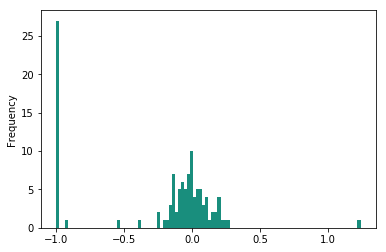

In [15]:
((compare_df[1.0] - compare_df.est_denom_1) / compare_df.est_denom_1).plot.hist(bins=100)

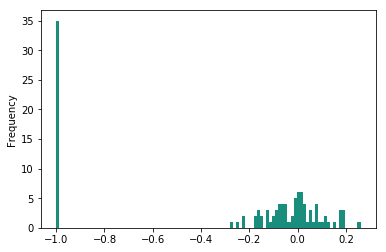

In [16]:
((compare_df[2.0] - compare_df.est_denom_2) / compare_df.est_denom_2).plot.hist(bins=100)

In [18]:
((compare_df[1.0] - compare_df.est_denom_1) / compare_df.est_denom_1).abs().dropna().sort_values()

Country Code
GNB    0.000861
GNQ    0.001766
BEN    0.002912
KAZ    0.004118
ARM    0.004510
ZMB    0.006639
TUR    0.009828
GBR    0.010181
UGA    0.010292
GIN    0.014659
SVK    0.014909
BEL    0.016023
KEN    0.016536
TJK    0.017144
BDI    0.020079
BLR    0.021399
SYC    0.022051
PRT    0.025057
MUS    0.025149
PRK    0.025729
DNK    0.027052
HRV    0.031188
MDG    0.038926
OMN    0.040866
BGD    0.043396
UZB    0.044990
MLI    0.045784
KGZ    0.045942
TZA    0.048263
MKD    0.053566
         ...   
ESP    0.534177
ROU    0.919273
BLZ    1.000000
IDN    1.000000
BHR    1.000000
URY    1.000000
TLS    1.000000
BHS    1.000000
HTI    1.000000
VCT    1.000000
HND    1.000000
ARG    1.000000
CRI    1.000000
SUR    1.000000
COL    1.000000
KNA    1.000000
DOM    1.000000
MEX    1.000000
BRB    1.000000
BRN    1.000000
DMA    1.000000
PRY    1.000000
CUB    1.000000
PAN    1.000000
GRD    1.000000
NPL    1.000000
NIC    1.000000
BRA    1.000000
GUY    1.000000
MNE    1.238723
Length: 113